In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from random import seed as seed2
from tensorflow import random
from numpy.random import seed
from termcolor import colored
from matplotlib.pyplot import figure, subplot, plot, xlabel, ylabel, xlim, ylim, legend, title

seed2(42)
seed(42)
random.set_seed(42)

#  Lecture du Dataset

In [2]:
df = pd.read_csv('C:/Users/d/Music/csv/flow1_nrml.csv', low_memory=False)
df = df[df['Attack'] != 1]
df = df[df['Arp'] != 1]

df = df[df['Port_src'] != 5005]
df = df[df['Port_dst'] != 5005]

for j in ['Tcp','Ftp','Icmp','Dns','Port_dst','Udp','Dhcp','SSH','SSL','Http','SYN','ACK','FIN','PSH','RST','URG', 'NS', 'WCR', 'ECE']:
    df.fillna({f'{j}': 0}, inplace=True)
for i in ['Icmp_code','Icmp_type']:
    df.fillna({f'{i}': -1}, inplace=True)
df.head()

,Datapath_id,Arp,Arp_code,Port_src,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,NS,...,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack,Attack_type,Same_ip
0,1,0,NaN,45182.0,22.0,0.0,-4.0,-4.0,1.0,0.0,...,745000000,0,0.0,0.0,0,0.0,0.0,0,NaN,0
1,1,0,NaN,22.0,45182.0,0.0,-4.0,-4.0,1.0,0.0,...,740000000,0,0.0,0.0,0,0.0,0.0,0,NaN,0
2,1,0,NaN,45182.0,22.0,0.0,-4.0,-4.0,1.0,0.0,...,725000000,0,0.0,0.0,0,0.0,0.0,0,NaN,0
3,1,0,NaN,45182.0,22.0,0.0,-4.0,-4.0,1.0,0.0,...,719000000,0,0.0,0.0,0,0.0,0.0,0,NaN,0
4,1,0,NaN,22.0,45182.0,0.0,-4.0,-4.0,1.0,0.0,...,705000000,0,0.0,0.0,0,0.0,0.0,0,NaN,0


In [3]:
df.columns

Index(['Datapath_id', 'Arp', 'Arp_code', 'Port_src', 'Port_dst', 'Icmp',
       'Icmp_code', 'Icmp_type', 'Tcp', 'NS', 'WCR', 'ECE', 'URG', 'ACK',
       'PSH', 'RST', 'SYN', 'FIN', 'Http', 'SSL', 'SSH', 'Ftp', 'Udp', 'Dns',
       'Dhcp', 'Flow_duration', 'Flow_dur_nsec', 'Packet_count', 'Pkt_per_sec',
       'Pkt_per_nsec', 'Bytes', 'Bytes_per_sec', 'Bytes_per_nsec', 'Attack',
       'Attack_type', 'Same_ip'],
      dtype='object')

# Selection des carecteristiques 1

In [4]:
columns_to_drop = ['Arp', 'Arp_code','Port_src','Attack_type'] 
df = df.drop(columns=columns_to_drop)

# Null values

In [5]:
number_null_value=df.isnull().sum()
number_null_value

Datapath_id       0
Port_dst          0
Icmp              0
Icmp_code         0
Icmp_type         0
Tcp               0
NS                0
WCR               0
ECE               0
URG               0
ACK               0
PSH               0
RST               0
SYN               0
FIN               0
Http              0
SSL               0
SSH               0
Ftp               0
Udp               0
Dns               0
Dhcp              0
Flow_duration     0
Flow_dur_nsec     0
Packet_count      0
Pkt_per_sec       0
Pkt_per_nsec      0
Bytes             0
Bytes_per_sec     0
Bytes_per_nsec    0
Attack            0
Same_ip           0
dtype: int64

In [6]:
for j in ['Port_dst','SYN','ACK','FIN','PSH','RST','URG', 'NS', 'WCR', 'ECE']:
    df.fillna({f'{j}': -1}, inplace=True)
for i in ['Icmp_code','Icmp_type']:
    df.fillna({f'{i}': -1}, inplace=True)

# Selection des carecteristiques par correlation

<Axes: >

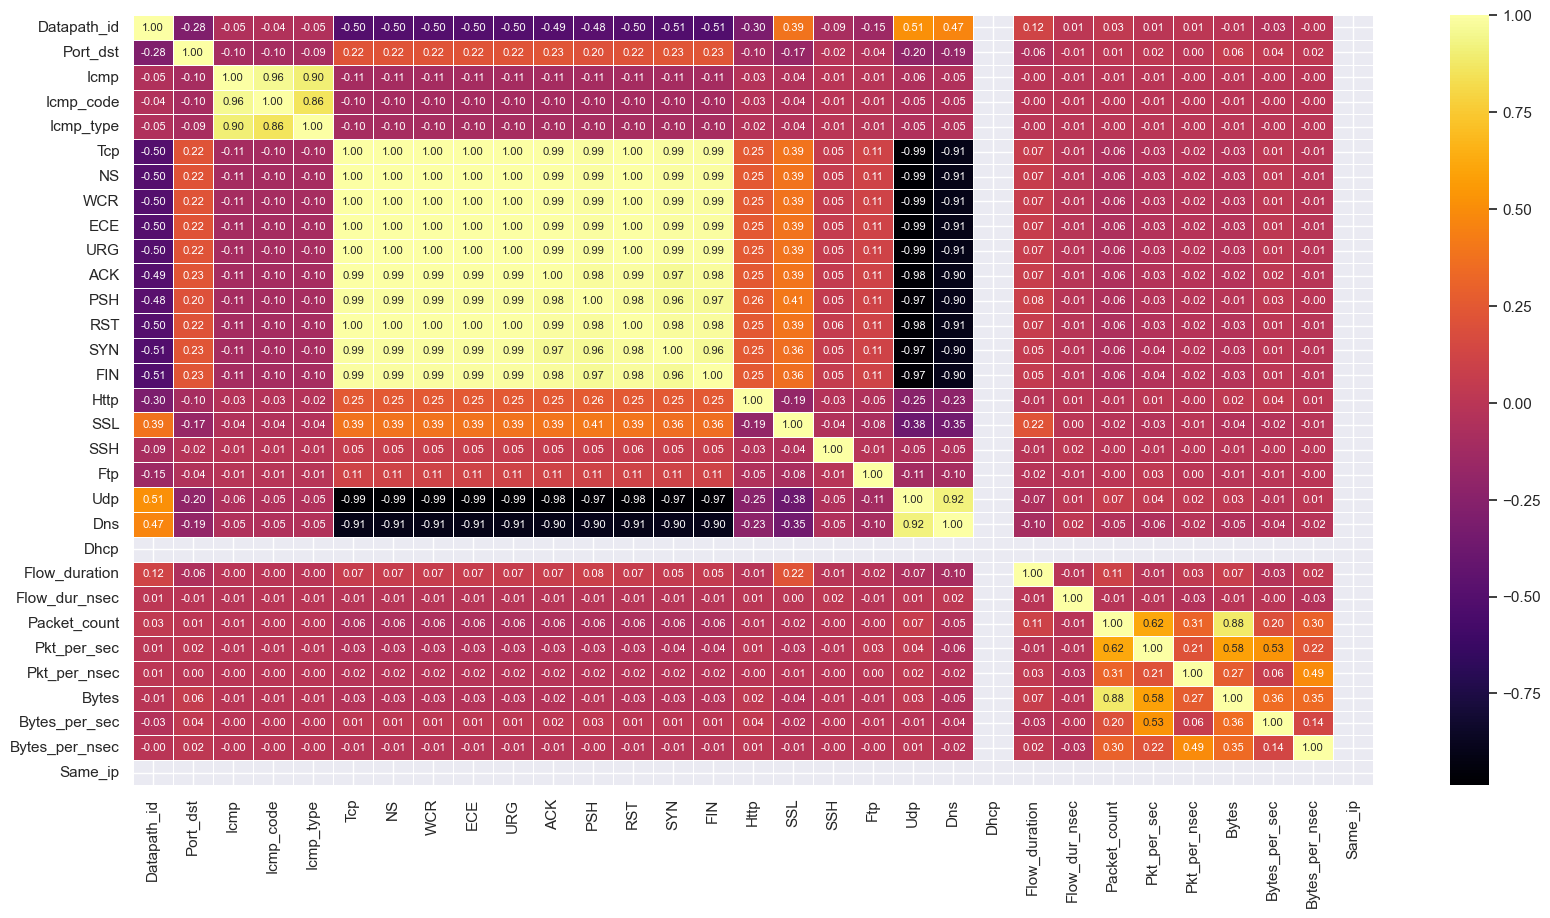

In [7]:
cl = ['Attack']
corr = df.drop(cl, axis=1).corr(method='pearson')
sb.set(rc={'figure.figsize':(20,10)})
sb.heatmap(corr, 
           xticklabels=corr.columns,
           yticklabels=corr.columns,
           annot=True,
           fmt=".2f",
           linewidth=0.4,
           cmap='inferno',
           annot_kws={"size": 8})

In [8]:
columns_to_drop = ['Bytes', 'Dhcp', 'Dns', 'Icmp_code','Attack']
df = df.drop(columns=columns_to_drop)

# Filtrage de colonne Port_dst

In [9]:
print(df['Port_dst'].describe())

count    209873.000000
mean      30211.426992
std       23398.804914
min          -4.000000
25%         443.000000
50%       39188.000000
75%       50056.000000
max       60999.000000
Name: Port_dst, dtype: float64


In [10]:
def filter_port(port):
    ports = [21, 22, 53, 80, 443,0]
    if port not in ports:
        return 0
    else:
        return port

df['Port_dst'] = df['Port_dst'].apply(filter_port)
dp0 = df.copy()
port_count = df['Port_dst'].value_counts().sort_values(ascending=False)
port_count = port_count.head(10)
for port, count in port_count.items():
    print(f"Port: {port}, Count: {count}")

Port: 0.0, Count: 135750
Port: 53.0, Count: 31609
Port: 443.0, Count: 28000
Port: 80.0, Count: 11450
Port: 21.0, Count: 2470
Port: 22.0, Count: 594


# Deviser data en Training - Validation - Test

In [11]:
X_train, X_test = train_test_split(df, test_size=0.20, shuffle=True, random_state=42)
X_train, X_val= train_test_split(X_train,test_size=0.15, shuffle=True, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(142713, 27)
(25185, 27)
(41975, 27)


# Normalisation des donnees

In [12]:
num = ["Flow_duration","Packet_count","Port_dst","Flow_dur_nsec", "Icmp_type", "Bytes_per_nsec","Pkt_per_nsec","Pkt_per_sec","Bytes_per_sec"]
df[num].describe()

,Flow_duration,Packet_count,Port_dst,Flow_dur_nsec,Icmp_type,Bytes_per_nsec,Pkt_per_nsec,Pkt_per_sec,Bytes_per_sec
count,209873.000000,209873.000000,209873.000000,2.098730e+05,209873.000000,2.098730e+05,2.098730e+05,209873.000000,2.098730e+05
mean,32.889781,24.101280,71.758706,4.937335e+08,-3.951509,1.952314e-04,1.499202e-07,0.779250,1.730798e+03
std,22.427210,333.811157,147.688682,2.847736e+08,0.682911,6.447198e-03,5.484554e-06,8.153705,3.159461e+04
min,0.000000,0.000000,0.000000,0.000000e+00,-4.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,15.000000,0.000000,0.000000,2.500000e+08,-4.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
50%,31.000000,0.000000,0.000000,4.910000e+08,-4.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
75%,47.000000,1.000000,53.000000,7.360000e+08,-4.000000,4.180000e-07,3.750000e-09,0.053333,5.823529e+00
max,120.000000,44566.000000,443.000000,9.990000e+08,8.000000,2.038976e+00,1.641000e-03,1306.888889,2.502982e+06


In [13]:
df[num].plot(kind='density', subplots=True, layout=(3,3), sharex=False)

StandardScaler est efficace pour les données lorsqu'il y a des valeurs aberrantes(outliers) ; une grande différence entre le minimum et le maximum des données avec une grande variation standard et une moyenne. Le Standard Scaler rend la moyenne égale à 0 et la variance égale à 1.

In [ ]:
scaler_std = StandardScaler()
num1=["Flow_duration","Packet_count","Port_dst","Flow_dur_nsec", "Icmp_type",'ACK', 'PSH','RST', 'SYN', 'FIN','URG','NS', 'WCR', 'ECE']
scaler_std.fit(X_train[num1])
X_train[num1] = scaler_std.transform(X_train[num1])
X_test[num1] = scaler_std.transform(X_test[num1])
X_val[num1] = scaler_std.transform(X_val[num1])

X_train[num1].describe()

,Flow_duration,Packet_count,Port_dst,Flow_dur_nsec,Icmp_type,ACK,PSH,RST,SYN,FIN,URG,NS,WCR,ECE
count,1.427130e+05,1.427130e+05,1.427130e+05,1.427130e+05,1.427130e+05,1.427130e+05,1.427130e+05,1.427130e+05,1.427130e+05,1.427130e+05,1.427130e+05,1.427130e+05,1.427130e+05,1.427130e+05
mean,1.379134e-16,-4.779670e-18,5.317383e-17,-9.452295e-17,3.094338e-16,-3.973101e-17,-2.223044e-17,1.473732e-17,4.727392e-17,-3.529985e-17,-2.763247e-17,-2.763247e-17,-2.763247e-17,-2.763247e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.464374e+00,-7.186122e-02,-4.870598e-01,-1.732674e+00,-7.001853e-02,-1.374915e+00,-1.364912e+00,-1.382468e+00,-1.364851e+00,-1.365036e+00,-1.384506e+00,-1.384506e+00,-1.384506e+00,-1.384506e+00
25%,-7.965960e-01,-7.186122e-02,-4.870598e-01,-8.576812e-01,-7.001853e-02,-1.374915e+00,-1.364912e+00,-1.382468e+00,-1.364851e+00,-1.365036e+00,-1.384506e+00,-1.384506e+00,-1.384506e+00,-1.384506e+00
50%,-8.429927e-02,-7.186122e-02,-4.870598e-01,-1.431475e-02,-7.001853e-02,7.735337e-01,5.988374e-01,7.125270e-01,5.982369e-01,6.000557e-01,7.222795e-01,7.222795e-01,7.222795e-01,7.222795e-01
75%,6.279974e-01,-6.887139e-02,-1.290555e-01,8.501359e-01,-7.001853e-02,7.735337e-01,5.988374e-01,7.125270e-01,5.982369e-01,6.000557e-01,7.222795e-01,7.222795e-01,7.222795e-01,7.222795e-01
max,3.877851e+00,1.331728e+02,2.505316e+00,1.777839e+00,1.790489e+01,7.735337e-01,1.089775e+00,1.236276e+00,1.089009e+00,1.091329e+00,7.222795e-01,7.222795e-01,7.222795e-01,7.222795e-01


MinMaxScaler rend les données dans la même plage, en fixant le minimum à 0 et le maximum à 1.

In [ ]:
scaler_min = MinMaxScaler()
num2=["Bytes_per_nsec","Pkt_per_nsec","Pkt_per_sec","Bytes_per_sec"]
scaler_min.fit(X_train[num2])
X_train[num2] = scaler_min.transform(X_train[num2])
X_test[num2] = scaler_min.transform(X_test[num2])
X_val[num2] = scaler_min.transform(X_val[num2])

X_train[num2].describe()

,Bytes_per_nsec,Pkt_per_nsec,Pkt_per_sec,Bytes_per_sec
count,1.427130e+05,142713.000000,142713.000000,142713.000000
mean,1.000193e-04,0.000093,0.000582,0.000683
std,3.610833e-03,0.003751,0.006271,0.012234
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000,0.000000,0.000000
75%,2.079475e-07,0.000002,0.000041,0.000002
max,1.000000e+00,1.000000,1.000000,1.000000


# Création de notre modéle d'apprentissage

In [ ]:
adam = Adam()
model = Sequential()
model.add(Dense(30, input_dim=df.shape[1]))
model.add(Dense(10))
model.add(Dense(6))
model.add(Dense(10))
model.add(Dense(30))
model.add(Dense(df.shape[1]))
model.compile(loss='mean_squared_error', optimizer=adam, metrics=["accuracy"])
model.summary()
pr=model.fit(X_train,X_train,validation_data=(X_val, X_val),epochs=40,batch_size=2000)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                840       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 10)                70        
                                                                 
 dense_4 (Dense)             (None, 30)                330       
                                                                 
 dense_5 (Dense)             (None, 27)                837       
                                                                 
Total params: 2453 (9.58 KB)
Trainable params: 2453 (9.5

# Enregistrement de notre modele

In [ ]:
model.save('GAN.keras')

In [ ]:
import pickle
with open('scaler_min.pkl', 'wb') as f:
    pickle.dump(scaler_min, f)

with open('scaler_std.pkl', 'wb') as f:
    pickle.dump(scaler_std, f)

# Choosing threshold

In [ ]:
def detection(loss):
    if np.sqrt(loss) < 0.174:
        Traffic = colored('Traffic normal', 'green')
    else:
        Traffic = colored('Attaque', 'red')
    return Traffic

# Evaluating other dataset using our model

In [ ]:
def traitement(df):
    df = df[df['Arp'] != 1]

    df1 = df.copy()
    for j in ['Tcp','Ftp','Icmp','Dns','Port_dst','Udp','Dhcp','SSH','SSL','Http','SYN','ACK','FIN','PSH','RST','URG', 'NS', 'WCR', 'ECE']:
      df1.fillna({f'{j}': 0}, inplace=True)
    for i in ['Icmp_code','Icmp_type']:
      df1.fillna({f'{i}': -1}, inplace=True)

    num = ['Datapath_id', 'Port_dst', 'Icmp', 'Icmp_type', 'Tcp', 'ACK', 'PSH',
       'RST', 'SYN', 'FIN','URG','NS', 'WCR', 'ECE', 'Http', 'SSL', 'SSH', 'Ftp', 'Udp',
       'Flow_duration', 'Flow_dur_nsec', 'Packet_count', 'Pkt_per_sec',    
       'Pkt_per_nsec', 'Bytes_per_sec', 'Bytes_per_nsec', 'Same_ip']
    
    df1 = df1[num]
    df1['Port_dst'] = df1['Port_dst'].apply(filter_port)
    return df1



In [ ]:
dk = pd.read_csv('C:/Users/d/Music/csv/flow1_SYN_flood.csv', low_memory=False)
dk = traitement(dk)

dk0 = pd.read_csv('C:/Users/d/Music/csv/flow1_UDP_flood.csv', low_memory=False)
dk0 = traitement(dk0)

dk1 = pd.read_csv('C:/Users/d/Music/csv/flow1_ICMP_flood.csv', low_memory=False)
dk1 = traitement(dk1)

dk2 = pd.read_csv('C:/Users/d/Music/csv/flow1_HTTP_flood.csv', low_memory=False)
dk2 = traitement(dk2)

dk3 = pd.read_csv('C:/Users/d/Music/csv/flow1_SLOWLORIS.csv', low_memory=False)
dk3 = traitement(dk3)

dk4 = pd.read_csv('C:/Users/d/Music/csv/flow1_LAND_Attack.csv', low_memory=False)
dk4 = traitement(dk4)

In [ ]:
dk[num1] = scaler_std.transform(dk[num1])
dk0[num1] = scaler_std.transform(dk0[num1])
dk1[num1] = scaler_std.transform(dk1[num1])
dk2[num1] = scaler_std.transform(dk2[num1])
dk3[num1] = scaler_std.transform(dk3[num1])
dk4[num1] = scaler_std.transform(dk4[num1])
dp0[num1] = scaler_std.transform(dp0[num1])

dk[num2] = scaler_min.transform(dk[num2])
dk0[num2] = scaler_min.transform(dk0[num2])
dk1[num2] = scaler_min.transform(dk1[num2])
dk2[num2] = scaler_min.transform(dk2[num2])
dk3[num2] = scaler_min.transform(dk3[num2])
dk4[num2] = scaler_min.transform(dk4[num2])
dp0[num2] = scaler_min.transform(dp0[num2])

In [ ]:
loss, accuracy = model.evaluate(X_test, X_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test RMSE: {np.sqrt(loss):.4f} ---> {detection(loss)}")

loss, accuracy = model.evaluate(dp0, dp0)
print(f"\nFull dataset Loss: {loss:.4f}")
print(f"Test RMSE: {np.sqrt(loss):.4f} ---> {detection(loss)}")

loss, accuracy = model.evaluate(dk, dk)
print(f"\nSYN flood Loss: {loss:.4f}")
print(f"RMSE: {np.sqrt(loss):.4f} ---> {detection(loss)}")

loss, accuracy = model.evaluate(dk1, dk1)
print(f"\nICMP flood Loss: {loss:.4f}")
print(f"RMSE: {np.sqrt(loss):.4f} ---> {detection(loss)}")

loss, accuracy = model.evaluate(dk0, dk0)
print(f"\nUDP flood Loss: {loss:.4f}")
print(f"RMSE: {np.sqrt(loss):.4f} ---> {detection(loss)}")

loss, accuracy = model.evaluate(dk2, dk2)
print(f"\nHTTP flood Loss: {loss:.4f}")
print(f"RMSE: {np.sqrt(loss):.4f} ---> {detection(loss)}")

loss, accuracy = model.evaluate(dk4, dk4)
print(f"\nLAND attack Loss: {loss:.4f}")
print(f"RMSE: {np.sqrt(loss):.4f} ---> {detection(loss)}")

loss, accuracy = model.evaluate(dk3, dk3)
print(f"\nSLOWLORIS attack Loss: {loss:.4f}")
print(f"RMSE: {np.sqrt(loss):.4f} ---> {detection(loss)}")

1312/1312 [==============================] - 2s 1ms/step - loss: 0.0300 - accuracy: 0.9067
Test Loss: 0.0300
Test RMSE: 0.1732 ---> Traffic normal
6559/6559 [==============================] - 9s 1ms/step - loss: 0.0301 - accuracy: 0.9092

Full dataset Loss: 0.0301
Test RMSE: 0.1736 ---> Traffic normal
3916/3916 [==============================] - 5s 1ms/step - loss: 0.0762 - accuracy: 0.0495

SYN flood Loss: 0.0762
RMSE: 0.2760 ---> Attaque
3561/3561 [==============================] - 5s 1ms/step - loss: 0.0522 - accuracy: 1.0000

ICMP flood Loss: 0.0522
RMSE: 0.2285 ---> Attaque
3535/3535 [==============================] - 5s 1ms/step - loss: 0.0888 - accuracy: 0.9470

UDP flood Loss: 0.0888
RMSE: 0.2979 ---> Attaque
4101/4101 [==============================] - 6s 1ms/step - loss: 0.0651 - accuracy: 0.1811

HTTP flood Loss: 0.0651
RMSE: 0.2551 ---> Attaque
3115/3115 [==============================] - 4s 1ms/step - loss: 0.1355 - accuracy: 0.1284

LAND attack Loss: 0.1355
RMSE: 0.3682 -